In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

In [2]:
#import BH dataset from sklearn and other required functions

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

# Step 1: Data pre processing
### Loading the data

In [3]:
boston=load_boston()

#Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#Put the data into pandas dataframe
features=pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
target=pd.DataFrame(boston.target,columns=['Price'])
target

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
max(target['Price'])

50.0

In [7]:
min(target['Price'])

5.0

In [8]:
#concatenate features and targets into single dataframe
#axis=1 makes it concatenate column wise
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
#use describe() to generate a summary
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# STEP 2: Data Visualization

In [10]:
#Calculate correlation between every column of data
corr=df.corr('pearson')

In [11]:
corrs=[abs(corr[attr]['Price'])for attr in list(features)]
corrs

[0.3883046085868114,
 0.3604453424505447,
 0.483725160028373,
 0.1752601771902975,
 0.4273207723732817,
 0.6953599470715389,
 0.3769545650045959,
 0.24992873408590394,
 0.3816262306397776,
 0.46853593356776646,
 0.507786685537561,
 0.33346081965706653,
 0.7376627261740143]

In [12]:
#make list of pairs[(corrs,feature)]
l=list(zip(corrs,list(features)))

In [13]:
#Sort the list of pairs in descending order
#with the correlation value as the key of sorting
l.sort(key=lambda x:x[0],reverse=True)

In [14]:
#Unzip pairs to two list 
corrs,labels=list(zip((*l)))

In [15]:
np.arange(len(labels))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

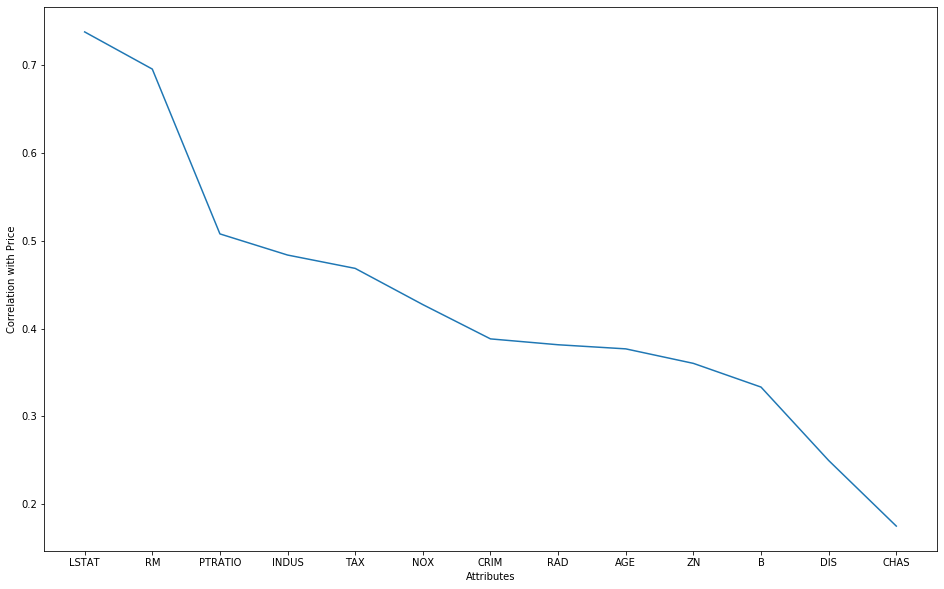

In [16]:
#Plot correlations with respect to the 
#target variable as bar graph
index=np.arange(len(labels))
plt.figure(figsize=(16,10))
plt.plot(index,corrs)
plt.xlabel('Attributes')
plt.ylabel("Correlation with Price")
plt.xticks(index,labels)
plt.show()

# STEP 3: Normalization of BH data
### Normalize using MinMaxScaler()

In [36]:
X=df['LSTAT'].values
Y=df['Price'].values

In [43]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:, -1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:, -1]

In [44]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2)

In [20]:
def gradient_descent(init_m,init_c,x,y,learning_rate,et,iteration):
    m=init_m
    c=init_c
    n=len(x)
    error_vals=[]
    mc_values=[]
    for i in range(iteration):
        y_pred=m*x+c
        e=(1/(2*n))*sum([val**2 for val in (y-y_pred)])
        if (e<et):
            print("Error less than threshold.Stopping now.")
            break
        error_vals.append(e)
        md=-(2)*sum(x*(y-y_pred))
        cd=-(2)*sum(y-y_pred)
        m=m-learning_rate*md
        c=c-learning_rate*cd
        mc_values.append(('m', m, 'c', c))
    return m,c,error_vals,mc_values

In [21]:
%%time
init_m=0.9
init_c=0
learning_rate=0.002
iteration=250
et=0.001
m,c,error_values,mc_values=gradient_descent(init_m,init_c,x_train,y_train,learning_rate,et,iteration)
for i in range(iteration):
    print(mc_values[i])
    print("Cost =", error_values[i])
print("Final m= ",m)
print("Final c= ",c)


('m', 0.8494521649127639, 'c', 0.17973422369389255)
Cost = 0.07005693263224567
('m', 0.7210674143845073, 'c', 0.09395582234413634)
Cost = 0.06203350081913631
('m', 0.6625219364967644, 'c', 0.21013420348824474)
Cost = 0.055414896526576406
('m', 0.5592093113418903, 'c', 0.1674518549968841)
Cost = 0.04984103820765793
('m', 0.4991000161971939, 'c', 0.24471368194775)
Cost = 0.04507383083026282
('m', 0.4137583543939908, 'c', 0.22677544336267338)
Cost = 0.04095056247671026
('m', 0.3555602415124602, 'c', 0.2799288861542708)
Cost = 0.03735581489887184
('m', 0.28361400634914913, 'c', 0.27589852643377244)
Cost = 0.034204448424808256
('m', 0.22907841994296022, 'c', 0.3138760540200446)
Cost = 0.03143122083182189
('m', 0.16749668842401677, 'c', 0.3173871429486218)
Cost = 0.028984388807326247
('m', 0.11738330026151525, 'c', 0.3456057885584006)
Cost = 0.026821707869255914
('m', 0.06409039761180807, 'c', 0.35294664800704884)
Cost = 0.024907883407244896
('m', 0.018599634924972873, 'c', 0.374716843871072

## Plotting the regression line (Training data)

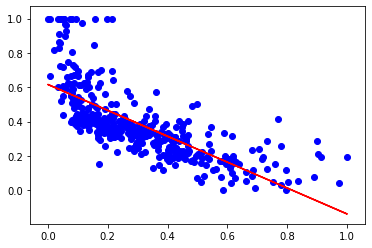

In [22]:
plt.scatter(x_train,y_train,color='b')
plt.plot(x_train,(m * x_train + c),color='r')
plt.show()

# Plotting error values

Text(0.5, 0, 'Iterations')

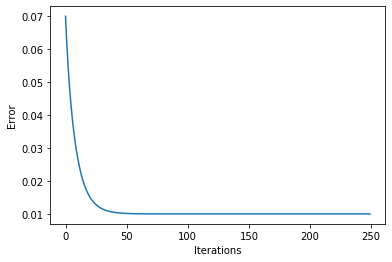

In [23]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

# Prediction

In [24]:
y_pred=m*x_test+c

In [25]:
mean_squared_error(y_test,y_pred)
#Observe mse, it must be very low

0.015659805836845953

In [26]:
#Putting x,y,y_pred into a single DF
p=pd.DataFrame(list(zip(x_test,y_test,y_pred)),columns=['x','y','y_pred'])
p.head()
#observe the predicted values are close to target values

,x,y,y_pred
0,0.350717,0.244444,0.351741
1,0.160872,0.773333,0.494856
2,0.360927,0.364444,0.344044
3,0.354857,0.268889,0.348620
4,0.501932,0.077778,0.237748


# Plot the predicted values (Testing data)

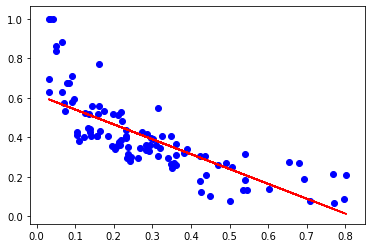

In [27]:
plt.scatter(x_test,y_test,color='b')
plt.plot(x_test,y_pred,color='r')

# Revert normalization
## To obtain the prediicted prices in 1000's of $

In [28]:
y_pred=y_pred.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

x_scaled=x_scaler.inverse_transform(x_test)
y_scaled=y_scaler.inverse_transform(y_test)
y_pred_scaled=y_scaler.inverse_transform(y_pred)

#Remove extra dimension
x_scaled=x_scaled[:,-1]
y_scaled=y_scaled[:,-1]
y_pred_scaled=y_pred_scaled[:,-1]

p=pd.DataFrame(list(zip(x_scaled,y_scaled,y_pred_scaled)),columns=['x','y','y_pred'])
p=p.round(decimals=2)
p[:10]

,x,y,y_pred
0,14.44,16.0,20.83
1,7.56,39.8,27.27
2,14.81,21.4,20.48
3,14.59,17.1,20.69
4,19.92,8.5,15.70
5,9.71,26.7,25.26
6,2.94,33.4,31.59
7,6.90,30.1,27.89
8,29.68,8.1,6.56
9,10.27,20.8,24.73
